<a href="https://colab.research.google.com/github/dindapusparahmi/Analisis-Sentimen-Ulasan-di-Google-Maps/blob/master/%5BHeadline%5DDetik_Weekly_news_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv
hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

In [47]:
import os
import csv
import requests as req
from bs4 import BeautifulSoup as bs

def scrape_detik_anggaran_dki(hal):
    # Tentukan header
    header = ['headline', 'tanggal', 'link', 'content']

    # Cek apakah file CSV sudah ada
    if not os.path.exists('anggaran_jakarta.csv'):
        # Jika tidak, buat file baru dan tulis header
        with open('anggaran_jakarta.csv', 'w', newline='', encoding='utf-8') as file:
            wr = csv.writer(file)
            wr.writerow(header)

    # Lanjutkan scraping data
    with open('anggaran_jakarta.csv', 'a', newline='', encoding='utf-8') as file:
        wr = csv.writer(file)
        for page in range(1, hal + 1):  # Adjusted range to include 'hal'
            url = f'https://www.detik.com/search/searchnews?query=anggaran+jakarta&sortby=time&sorttime=2&fromdatex=21%2F03%2F2024&todatex=28%2F03%2F2024&result_type=relevansi&siteid=29&time=3&page={page}'
            try:
                ge = req.get(url).text
                sop = bs(ge, 'html.parser')  # Changed parser to 'html.parser'
                li = sop.find('div', class_='list media_rows list-berita')
                lin = li.find_all('article')
                a = 1
                for x in lin:
                    link = x.find('a')['href']
                    date = x.find('a').find('span', class_='date').text.replace('WIB', '').replace('detikNews', '').split(',')[1]
                    headline = x.find('a').find('h2').text
                    try:
                        ge_ = req.get(link).text
                        sop_ = bs(ge_, 'html.parser')  # Changed parser to 'html.parser'
                        content = sop_.find_all('div', class_='detail__body-text itp_bodycontent')
                        for x in content:
                            x = x.find_all('p')
                            y = [y.text for y in x]
                            content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '')
                            print(f'done[{a}] > {headline[0:10]}')
                            a += 1
                            # Tulis baris data ke file CSV
                            wr.writerow([headline, date, link, content_])
                    except Exception as e:
                        print(f"Error scraping content from {link}: {e}")
            except Exception as e:
                print(f"Error accessing page {page}: {e}")

# Panggil fungsi scrape_detik_anggaran_dki dengan jumlah halaman yang ingin di-scrape
scrape_detik_anggaran_dki(10)  # Misalnya, di sini mencoba untuk scrape 5 halaman


done[1] > Penting bu
done[2] > Anggaran P
done[3] > Sri Mulyan
done[4] > Pemerintah
done[5] > Rapat Perd
done[6] > AHY Minta 
done[7] > AHY Ungkap
done[8] > ESDM Ungka
done[9] > Soal Dana 
done[10] > Mahasiswa 
done[1] > 85 Perusah
done[2] > Anggota DP
done[3] > Perjuangan
done[4] > 625 Ribu A
done[5] > Sri Mulyan
done[6] > Berapa Mod
done[7] > Jokowi Res
done[8] > Rapat di D
done[9] > Proyek Tol
done[10] > Anggota DP
done[1] > ESDM Minta
done[2] > Penemuan 3
done[3] > RKAB Tamba
done[4] > Update Ter
done[5] > Sri Mulyan
done[6] > Janji Peme
done[7] > THR Jokowi
done[8] > Ada PNS TH
done[9] > PNS THR-ny
done[10] > Kawasan Bl
done[1] > Anggota DP
done[2] > Bos MRT Be
done[3] > Kemendag J
done[4] > Rincian PS
done[5] > Buruan Cek
done[6] > Biar Tak B
done[7] > Anggota DP
done[8] > Anggota DP
done[9] > Telan Rp 3
done[10] > Jokowi Res
done[1] > Carbon Cap
done[2] > Bocoran Ha
done[3] > Tips Supay
done[4] > Daftar 14 
done[5] > 5 Tahun Be
done[6] > Menteri ES
done[7] > Kemenhub G
done[8] >

In [48]:
import pandas as pd

# Membaca file CSV dengan menentukan header secara manual
df_anggaran_jakarta = pd.read_csv("/content/anggaran_jakarta.csv", names=['headline', 'tanggal', 'link', 'content'])

# Menampilkan dataframe
df_anggaran_jakarta

,headline,tanggal,link,content
0,headline,tanggal,link,content
1,Penting buat Mudik! Segini Tarif Tol dari Jaka...,28 Mar 2024 05:00,https://finance.detik.com/infrastruktur/d-7265...,Pulang kampung pakai mobil pribadi jadi salah ...
2,"Anggaran Perlinsos Rp 496 T Jadi Sorotan, Sri ...",26 Mar 2024 06:30,https://finance.detik.com/berita-ekonomi-bisni...,Alokasi anggaran perlindungan sosial (perlinso...
3,Sri Mulyani Beri Penjelasan soal Anggaran Perl...,25 Mar 2024 11:54,https://finance.detik.com/berita-ekonomi-bisni...,Menteri Keuangan Sri Mulyani Indrawati memberi...
4,"Pemerintah Anggarkan Rp 39,3 T buat Bangun IKN...",25 Mar 2024 12:16,https://finance.detik.com/infrastruktur/d-7260...,"Pemerintah mengalokasikan Rp 39,3 triliun di t..."
...,...,...,...,...
95,Siap-siap! Tarif Tol Bali Mandara Bakal Naik,27 Mar 2024 17:06,https://finance.detik.com/infrastruktur/d-7264...,PT Jasa Marga (Persero) Tbk menyatakan masih t...
96,Luhut dan Menteri ESDM Turun Tangan Bawa Minya...,27 Mar 2024 16:23,https://finance.detik.com/energi/d-7264692/luh...,PT Pertamina (Persero) melalui PT Pertamina Hu...
97,Garuda Diskon Tiket hingga 80%! Cek di Sini Ru...,22 Mar 2024 20:17,https://finance.detik.com/berita-ekonomi-bisni...,Maskapai Garuda Indonesia berkolaborasi bersam...
98,"Genangan di Tol Bandara Soetta Surut, Jasa Mar...",23 Mar 2024 15:45,https://finance.detik.com/infrastruktur/d-7257...,Beberapa titik di ruas tol Sedyatmo atau tol m...


In [49]:
import os
import csv
import requests as req
from bs4 import BeautifulSoup as bs

def scrape_detik_apbn(hal):
    # Tentukan header
    header = ['headline', 'tanggal', 'link', 'content']

    # Cek apakah file CSV sudah ada
    if not os.path.exists('apbn.csv'):
        # Jika tidak, buat file baru dan tulis header
        with open('apbn.csv', 'w', newline='', encoding='utf-8') as file:
            wr = csv.writer(file)
            wr.writerow(header)

    # Lanjutkan scraping data
    with open('apbn.csv', 'a', newline='', encoding='utf-8') as file:
        wr = csv.writer(file)
        for page in range(1, hal + 1):  # Corrected range to include 'hal'
            url = f'https://www.detik.com/search/searchnews?query=apbn&sortby=time&sorttime=2&fromdatex=21%2F03%2F2024&todatex=28%2F03%2F2024&result_type=relevansi&siteid=29&time=3&page={page}'
            try:
                ge = req.get(url).text
                sop = bs(ge, 'html.parser')  # Changed parser to 'html.parser'
                li = sop.find('div', class_='list media_rows list-berita')
                lin = li.find_all('article')
                a = 1
                for x in lin:
                    link = x.find('a')['href']
                    date = x.find('a').find('span', class_='date').text.replace('WIB', '').replace('detikNews', '').split(',')[1]
                    headline = x.find('a').find('h2').text
                    try:
                        ge_ = req.get(link).text
                        sop_ = bs(ge_, 'html.parser')  # Changed parser to 'html.parser'
                        content = sop_.find_all('div', class_='detail__body-text itp_bodycontent')
                        for x in content:
                            x = x.find_all('p')
                            y = [y.text for y in x]
                            content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '')
                            print(f'done[{a}] > {headline[0:10]}')
                            a += 1
                            # Tulis baris data ke file CSV
                            wr.writerow([headline, date, link, content_])
                    except Exception as e:
                        print(f"Error scraping content from {link}: {e}")
            except Exception as e:
                print(f"Error accessing page {page}: {e}")

# Panggil fungsi scrape_detik_apbn dengan jumlah halaman yang ingin di-scrape
scrape_detik_apbn(10)  # Misalnya, di sini mencoba untuk scrape 5 halaman


done[1] > Sri Mulyan
done[2] > Pembanguna
done[3] > Daftar 14 
done[4] > Soal Dana 
done[5] > Penerimaan
done[6] > Kenapa BSD
done[7] > Long Weeke
done[8] > Masih Oper
done[9] > Sri Mulyan
done[1] > Pemerintah
done[2] > Bea Cukai 
done[3] > PPN Naik 1
done[4] > Sri Mulyan
done[5] > Anggaran P
done[6] > Mengintip 
done[7] > 85 Perusah
done[8] > Proyek Tol
done[9] > Bocoran Ha
done[10] > Sri Mulyan
done[1] > Heboh Atur
done[2] > Sri Mulyan
done[3] > Mahasiswa 
done[4] > Daftar 14 
done[5] > Proyek PIK
done[6] > IHSG Hari 
done[7] > 625 Ribu A
done[8] > Aturan Baw
done[9] > Duh IHSG M
done[10] > Batas Lapo
done[1] > Duh IHSG M
done[2] > Sri Mulyan
done[3] > Segini Nil
done[4] > Heboh Bara
done[5] > Sisa 6 Har
done[6] > Update Ter
done[7] > Siapa Peng
done[8] > Buruan Cek
done[9] > Begini Ren
done[10] > Tak Hadiri
done[1] > THR Jokowi
done[2] > Ada PNS TH
done[3] > PNS THR-ny
done[4] > Prabowo-Gi
done[5] > Masuk PSN 
done[6] > Rincian Pr
done[7] > Masuk PSN,
done[8] > Rapat Perd
done[9] > 

In [50]:
import pandas as pd

# Membaca file CSV dengan menentukan header secara manual
df_apbn = pd.read_csv("/content/apbn.csv", names=['headline', 'tanggal', 'link', 'content'])

# Menampilkan dataframe
df_apbn

,headline,tanggal,link,content
0,headline,tanggal,link,content
1,"Sri Mulyani: APBN Masih Surplus Rp 22,8 T",25 Mar 2024 11:03,https://finance.detik.com/berita-ekonomi-bisni...,Menteri Keuangan Sri Mulyani Indrawati mengumu...
2,Pembangunan Proyek Strategis Nasional PIK-BSD ...,24 Mar 2024 09:30,https://finance.detik.com/infrastruktur/d-7258...,Pemerintah baru saja mencanangkan 14 proyek st...
3,"Daftar 14 PSN Baru yang Dijamin Tanpa APBN, Ad...",25 Mar 2024 07:00,https://finance.detik.com/infrastruktur/d-7259...,Belasan proyek mendapatkan cap Proyek Strategi...
4,"Soal Dana LPDP Mau Disetop, Menko PMK: Belum, ...",25 Mar 2024 19:30,https://finance.detik.com/berita-ekonomi-bisni...,Menteri Koordinator Bidang Pembangunan Manusia...
5,Penerimaan Pajak Lesu Buntut Penurunan Harga K...,25 Mar 2024 15:45,https://finance.detik.com/berita-ekonomi-bisni...,Menteri Keuangan Sri Mulyani Indrawati mengumu...
6,Kenapa BSD dan PIK 2 Masuk dalam Proyek Strate...,28 Mar 2024 06:30,https://finance.detik.com/infrastruktur/d-7265...,Kementerian Koordinator Bidang Perekonomian bu...
7,"Long Weekend di Depan Mata, IHSG Hari Ini Mele...",28 Mar 2024 09:09,https://finance.detik.com/bursa-dan-valas/d-72...,Indeks Harga Saham Gabungan (IHSG) hari ini di...
8,"Masih Operasi, Begini Kondisi Salah Satu Ladan...",27 Mar 2024 11:33,https://finance.detik.com/energi/d-7263898/mas...,Menteri ESDM Arifin Tasrif meninjau proyek off...
9,Sri Mulyani Wanti-wanti Harga Telur Ayam hingg...,25 Mar 2024 11:39,https://finance.detik.com/berita-ekonomi-bisni...,Menteri Keuangan Sri Mulyani Indrawati mewanti...


In [51]:
import os
import csv
import requests as req
from bs4 import BeautifulSoup as bs

def scrape_detik_apbd_jakarta(hal):
    # Tentukan header
    header = ['headline', 'tanggal', 'link', 'content']

    # Cek apakah file CSV sudah ada
    if not os.path.exists('apbd_jakarta.csv'):
        # Jika tidak, buat file baru dan tulis header
        with open('apbd_jakarta.csv', 'w', newline='', encoding='utf-8') as file:
            wr = csv.writer(file)
            wr.writerow(header)

    # Lanjutkan scraping data
    with open('apbd_jakarta.csv', 'a', newline='', encoding='utf-8') as file:
        wr = csv.writer(file)
        for page in range(1, hal + 1):  # Corrected range to include 'hal'
            url = f'https://www.detik.com/search/searchnews?query=apbd+jakarta&sortby=time&sorttime=2&fromdatex=21%2F03%2F2024&todatex=28%2F03%2F2024&result_type=latest&siteid=29&time=3&page={page}'
            try:
                response = req.get(url)
                response.raise_for_status()  # Raise an HTTPError for bad requests
                sop = bs(response.text, 'html.parser')
                li = sop.find('div', class_='list media_rows list-berita')
                lin = li.find_all('article')
                a = 1
                for x in lin:
                    link = x.find('a')['href']
                    date = x.find('a').find('span', class_='date').text.replace('WIB', '').replace('detikNews', '').split(',')[1]
                    headline = x.find('a').find('h2').text
                    response_article = req.get(link)
                    response_article.raise_for_status()  # Raise an HTTPError for bad requests
                    sop_article = bs(response_article.text, 'html.parser')
                    content = sop_article.find_all('div', class_='detail__body-text itp_bodycontent')
                    for x in content:
                        x = x.find_all('p')
                        y = [y.text for y in x]
                        content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '')
                        print(f'done[{a}] > {headline[0:10]}')
                        a += 1
                        # Tulis baris data ke file CSV
                        wr.writerow([headline, date, link, content_])
            except req.exceptions.RequestException as e:
                print(f"Error accessing page {page}: {e}")

# Panggil fungsi scrape_detik_apbd_jakarta dengan jumlah halaman yang ingin di-scrape
scrape_detik_apbd_jakarta(10)  # Misalnya, di sini mencoba untuk scrape 5 halaman


done[1] > Terungkap 
done[2] > Rincian Pr
done[3] > PNS THR-ny
done[4] > Ada PNS TH
done[5] > THR Jokowi


In [52]:
import pandas as pd

# Membaca file CSV dengan menentukan header secara manual
df_apbd_jakarta = pd.read_csv("/content/apbd_jakarta.csv", names=['headline', 'tanggal', 'link', 'content'])

# Menampilkan dataframe
df_apbd_jakarta

,headline,tanggal,link,content
0,headline,tanggal,link,content
1,Terungkap Alasan Proyek Aguan & Sinar Mas Masu...,27 Mar 2024 17:34,https://finance.detik.com/infrastruktur/d-7264...,Kementerian Koordinator (Kemenko) Bidang Perek...
2,Rincian Proyek PIK 2 Milik Aguan yang Masuk PS...,27 Mar 2024 05:00,https://finance.detik.com/infrastruktur/d-7263...,Proyek Pengembangan Pantai Indah Kapuk (PIK) 2...
3,"PNS THR-nya Belum Cair Tak Perlu Khawatir, Ini...",23 Mar 2024 03:55,https://finance.detik.com/berita-ekonomi-bisni...,Tunjangan Hari Raya atau THR ASN (PNS/PPPK) te...
4,Ada PNS THR-nya Belum Cair? Begini Penjelasan ...,22 Mar 2024 15:41,https://finance.detik.com/berita-ekonomi-bisni...,Tunjangan Hari Raya (THR) untuk para Aparatur ...
5,THR Jokowi dan Pejabat Negara Lainnya Juga Cai...,22 Mar 2024 15:29,https://finance.detik.com/berita-ekonomi-bisni...,Pemerintah mulai mencairkan Tunjangan Hari Ray...


In [53]:
import os
import csv
import requests as req
from bs4 import BeautifulSoup as bs

def scrape_detik_inflasi(total_pages):
    # Tentukan header
    header = ['headline', 'tanggal', 'link', 'content']

    # Cek apakah file CSV sudah ada
    if not os.path.exists('inflasi.csv'):
        # Jika tidak, buat file baru dan tulis header
        with open('inflasi.csv', 'w', newline='', encoding='utf-8') as file:
            wr = csv.writer(file)
            wr.writerow(header)

    # Lanjutkan scraping data
    with open('inflasi.csv', 'a', newline='', encoding='utf-8') as file:
        wr = csv.writer(file)
        for page in range(1, total_pages + 1):  # Correct range to include total_pages
            url = f'https://www.detik.com/search/searchnews?query=inflasi&siteid=29&sortby=time&sorttime=2&fromdatex=21/03/2024&todatex=28/03/2024&result_type=latest&page={page}'
            try:
                ge = req.get(url).text
                sop = bs(ge, 'html.parser')  # Changed parser to 'html.parser'
                li = sop.find('div', class_='list media_rows list-berita')
                lin = li.find_all('article')
                a = 1
                for x in lin:
                    link = x.find('a')['href']
                    date = x.find('a').find('span', class_='date').text.replace('WIB', '').replace('detikNews', '').split(',')[1]
                    headline = x.find('a').find('h2').text
                    try:
                        ge_ = req.get(link).text
                        sop_ = bs(ge_, 'html.parser')  # Changed parser to 'html.parser'
                        content = sop_.find_all('div', class_='detail__body-text itp_bodycontent')
                        for x in content:
                            x = x.find_all('p')
                            y = [y.text for y in x]
                            content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '')
                            print(f'done[{a}] > {headline[0:10]}')
                            a += 1
                            # Tulis baris data ke file CSV
                            wr.writerow([headline, date, link, content_])
                    except Exception as e:
                        print(f"Error scraping content from {link}: {e}")
            except Exception as e:
                print(f"Error accessing page {page}: {e}")

# Panggil fungsi scrape_detik_apbd_jakarta dengan jumlah halaman yang ingin di-scrape
scrape_detik_inflasi(10)  # Misalnya, di sini mencoba untuk scrape 5 halaman


done[1] > Long Weeke
done[2] > Siap-siap!
done[3] > Pembatasan
done[4] > Bukan Pesu
done[5] > Pedagang N
done[6] > Di Luar Pr
done[7] > Harga Bera
done[8] > Harga Bawa
done[9] > Dulu Bagi-
done[10] > Aduh! Harg
done[1] > Investasi 
done[2] > Ekspedisi 
done[3] > IHSG Hari 
done[4] > Sri Mulyan
done[5] > Begini Car
done[6] > Buntut Inf
done[7] > Inflasi Tu
done[8] > IHSG Dipre
done[9] > Alasan Jas
done[10] > Ini Alasan
done[1] > 4 Cara Inv
done[2] > IHSG Hari 


In [54]:
import pandas as pd

# Membaca file CSV dengan menentukan header secara manual
df_inflasi = pd.read_csv("/content/inflasi.csv", names=['headline', 'tanggal', 'link', 'content'])

# Menampilkan dataframe
df_inflasi

,headline,tanggal,link,content
0,headline,tanggal,link,content
1,"Long Weekend di Depan Mata, IHSG Hari Ini Mele...",28 Mar 2024 09:09,https://finance.detik.com/bursa-dan-valas/d-72...,Indeks Harga Saham Gabungan (IHSG) hari ini di...
2,Siap-siap! Tarif Tol Bali Mandara Bakal Naik,27 Mar 2024 17:06,https://finance.detik.com/infrastruktur/d-7264...,PT Jasa Marga (Persero) Tbk menyatakan masih t...
3,Pembatasan Angkutan Barang Jelang Lebaran Dimi...,27 Mar 2024 13:36,https://finance.detik.com/berita-ekonomi-bisni...,Kebijakan pembatasan operasional angkutan bara...
4,"Bukan Pesugihan, Ini Tips Untung Pakai Duit TH...",27 Mar 2024 11:18,https://finance.detik.com/perencanaan-keuangan...,Menjelang Hari Raya Idul Fitri dan libur Lebar...
5,Pedagang Nakal Oplos-Naikkan Harga Beras SPHP ...,27 Mar 2024 09:35,https://finance.detik.com/berita-ekonomi-bisni...,Kepala Badan Pangan Nasional/National Food Age...
6,"Di Luar Prediksi, The Fed Pertimbangkan Cuma T...",27 Mar 2024 08:20,https://finance.detik.com/moneter/d-7263568/di...,Beberapa pejabat Bank Sentral Amerika Serikat ...
7,Harga Beras Diprediksi Sulit Balik ke HET Rp 1...,27 Mar 2024 06:00,https://finance.detik.com/berita-ekonomi-bisni...,Tingginya harga beras belum juga reda. Kantor ...
8,"Harga Bawang Putih Tembus Rp 50.000/Kg, KSP Un...",26 Mar 2024 12:58,https://finance.detik.com/berita-ekonomi-bisni...,Kantor Staf Presiden (KSP) mengungkap harga ba...
9,"Dulu Bagi-bagi Makan Siang Gratis, Negara Ini ...",26 Mar 2024 12:53,https://finance.detik.com/berita-ekonomi-bisni...,"Salah satu negara komunis terakhir di dunia, K..."


In [56]:
# Combine all DataFrames into one
combined_df = pd.concat([df_anggaran_jakarta, df_apbn, df_apbd_jakarta, df_inflasi])

# Reset index if needed
combined_df.reset_index(drop=True, inplace=True)
combined_df

,headline,tanggal,link,content
0,headline,tanggal,link,content
1,Penting buat Mudik! Segini Tarif Tol dari Jaka...,28 Mar 2024 05:00,https://finance.detik.com/infrastruktur/d-7265...,Pulang kampung pakai mobil pribadi jadi salah ...
2,"Anggaran Perlinsos Rp 496 T Jadi Sorotan, Sri ...",26 Mar 2024 06:30,https://finance.detik.com/berita-ekonomi-bisni...,Alokasi anggaran perlindungan sosial (perlinso...
3,Sri Mulyani Beri Penjelasan soal Anggaran Perl...,25 Mar 2024 11:54,https://finance.detik.com/berita-ekonomi-bisni...,Menteri Keuangan Sri Mulyani Indrawati memberi...
4,"Pemerintah Anggarkan Rp 39,3 T buat Bangun IKN...",25 Mar 2024 12:16,https://finance.detik.com/infrastruktur/d-7260...,"Pemerintah mengalokasikan Rp 39,3 triliun di t..."
...,...,...,...,...
175,"IHSG Diprediksi Menguat ke 7.400, Cek Sederet ...",22 Mar 2024 08:45,https://finance.detik.com/market-research/d-72...,Indeks Harga Saham Gabungan (IHSG) pada perdag...
176,Alasan Jasa Marga Naikkan Tarif Tol Japek dan ...,22 Mar 2024 05:00,https://finance.detik.com/infrastruktur/d-7254...,PT Jasa Marga (Persero) Tbk mengungkapkan alas...
177,Ini Alasan Jasa Marga Naikkan Tarif Tol Japek-...,21 Mar 2024 13:28,https://finance.detik.com/infrastruktur/d-7253...,PT Jasa Marga (Persero) Tbk memberi penjelasan...
178,"4 Cara Investasi Emas dengan Budget Terbatas, ...",21 Mar 2024 09:30,https://finance.detik.com/berita-ekonomi-bisni...,Emas sejak lama telah menjadi instrumen invest...


# Raw data without preprocessing

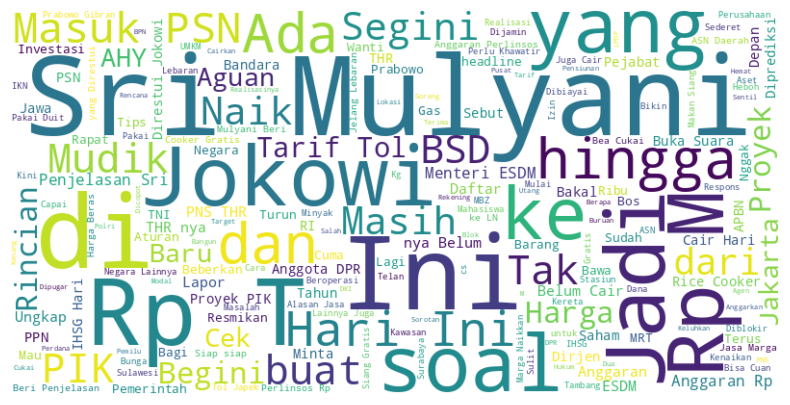

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already concatenated the DataFrames into one DataFrame named 'combined_df'

# Join all headlines into a single string
text = ' '.join(combined_df['headline'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()


# Preprocessing Headline

In [59]:
!pip install nltk sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [60]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Load stopwords for Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Example usage:
# Assuming 'text' is the column containing the text data in your DataFrame
combined_df['preprocessed_headline'] = combined_df['headline'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Wordcloud headline

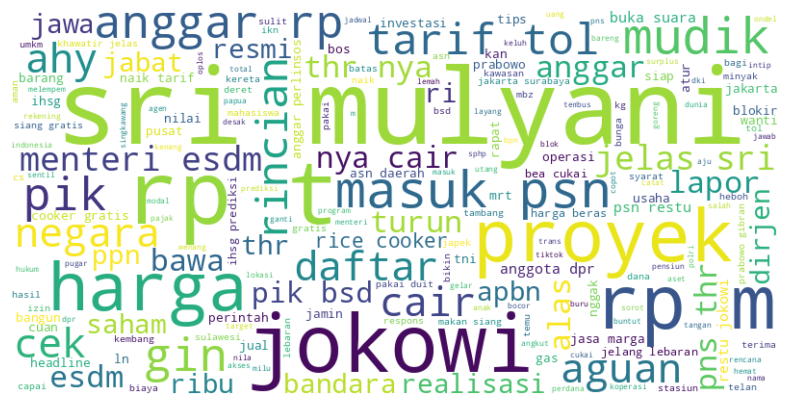

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'preprocessed_headline' is the column containing the preprocessed text
preprocessed_text = ' '.join(combined_df['preprocessed_headline'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()


# word cloud 3 gram

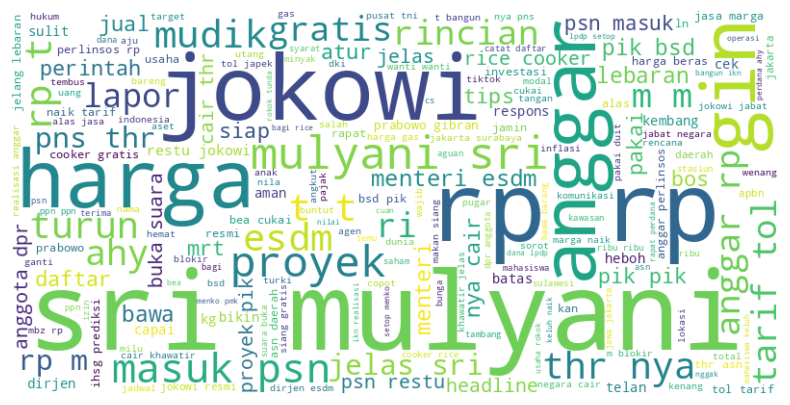

In [62]:
from wordcloud import WordCloud
from nltk import ngrams
import matplotlib.pyplot as plt

# Generate trigrams from preprocessed text
trigrams = ngrams(preprocessed_text.split(), 3)

# Convert trigrams into strings
trigram_strings = [' '.join(trigram) for trigram in trigrams]

# Join trigram strings into a single string
trigram_text = ' '.join(trigram_strings)

# Generate word cloud for trigrams
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()


# 1. Word Frequency Analysis

In [66]:
from collections import Counter

# Assuming 'preprocessed_headline' is the column containing the preprocessed text
preprocessed_text = ' '.join(combined_df['preprocessed_headline'])

# Tokenize the preprocessed text into words
words = preprocessed_text.split()

# Calculate word frequencies
word_freq = Counter(words)

# Print the most common words and their frequencies
print("Most common words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")


Most common words:
rp: 43
sri: 29
mulyani: 27
jokowi: 21
t: 20
anggar: 19
m: 16
psn: 16
harga: 15
pik: 14
esdm: 13
proyek: 13
cair: 13
2: 13
masuk: 13
tol: 11
thr: 11
mudik: 10
tarif: 10
jelas: 10


# 2. Keyword Extraction

using TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'preprocessed_headline' is the column containing the preprocessed text
preprocessed_text = combined_df['preprocessed_headline']

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate TF-IDF scores for each word
word_scores = dict(zip(feature_names, tfidf_matrix.sum(axis=0).tolist()[0]))

# Print top keywords based on TF-IDF scores
top_keywords_tfidf = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:20]
print("Top keywords using TF-IDF:")
for keyword, score in top_keywords_tfidf:
    print(f"{keyword}: {score}")


Top keywords using TF-IDF:
rp: 8.323725056166891
mulyani: 7.494458167259215
sri: 7.494458167259215
jokowi: 5.608073300369567
thr: 5.292790516496956
anggar: 5.197307250589064
cair: 4.588477501813788
psn: 4.381318083830486
pik: 4.2005827680012136
headline: 4.0
jelas: 3.8182254014617003
masuk: 3.7511959213056887
proyek: 3.6860011442873963
harga: 3.660214955513626
esdm: 3.533770300016487
tol: 3.1868350441230495
tarif: 3.1158200091083867
pns: 3.110339657251601
mudik: 2.98922107212794
bsd: 2.8580807980552496


# USING TEXT RANK

In [70]:
!pip install summa


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 972.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54386 sha256=868e720db548b0d3b2952f373f69097f5f00198d0aaaae8366ade290b6cab849
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [76]:
from summa import keywords

# Convert preprocessed text to Unicode string if needed
preprocessed_text_unicode = ' '.join(combined_df['preprocessed_headline']).encode('utf-8').decode('utf-8')

# Extract keywords using TextRank algorithm
keywords_text_rank = keywords.keywords(preprocessed_text_unicode, ratio=0.25)  # Adjust 'ratio' as needed, MAKIN KECIL MAKIN PENTING

print("Keywords using TextRank:")
print(keywords_text_rank)


Keywords using TextRank:
rp
jokowi
anggar
esdm
harga gas
sri mulyani jelas
thr
gratis
rincian psn pik
lapor
cair
negara proyek
cek
ahy
headline mudik gin tarif tol jakarta
lebaran
jual
ihsg
pakai
turun bikin
m blokir
tips
masuk
bos mrt
bawa
prabowo
ri salah
menteri hasil
bsd
daftar
atur
alas
saham
usaha
tni
siap
naik ppn
aguan
cukai anggota dpr
ribu asn
buka suara
batas
rapat
prediksi
investasi
cuan
operasi
beras
perintah
dirjen
sulit
nggak
resmi
indonesia
stasiun
kan
jamin
aman
bagi rice
dana
jawa
tambang
tiktok
apbn
barang ln
bunga
kawasan
syarat
bandara sulawesi telan
izin
utang minyak
anak
aju
agen
kereta
jabat
bareng
daerah
oplos
dunia
bangun ikn realisasi
nilai
lokasi
turki
uang
heboh
umkm
aset
jadwal
pns
bea
inflasi
buntut
deret
hukum
pusat
target temu
angkut
pajak
jelang
dki


# 3. Topic Modelling

# LDA

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'preprocessed_headline' is the column containing the preprocessed text
preprocessed_text = combined_df['preprocessed_headline']

# Initialize CountVectorizer to convert text to a matrix of token counts
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the preprocessed text
tf = count_vectorizer.fit_transform(preprocessed_text)

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust 'n_components' as needed

# Fit the model to the data
lda_model.fit(tf)

# Display the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10  # Number of top words to display for each topic
display_topics(lda_model, count_vectorizer.get_feature_names_out(), no_top_words)


Topic 1:
pik bsd psn rp masuk operasi nilai mrt jokowi proyek
Topic 2:
sri mulyani jelas thr cair pns rp nya bawa lapor
Topic 3:
mudik esdm menteri jakarta tarif harga tol prabowo turun asn
Topic 4:
rp anggar mulyani sri naik jokowi ahy dpr gratis realisasi
Topic 5:
proyek psn rp jokowi masuk pik aguan restu headline rincian


# NMF (Non negative Factorization)

In [81]:
from sklearn.decomposition import NMF

# Initialize NMF model
nmf_model = NMF(n_components=5, random_state=42)  # Adjust 'n_components' as needed

# Fit the model to the data
nmf_model.fit(tf)

# Display the topics
print("Topics using NMF:")
display_topics(nmf_model, count_vectorizer.get_feature_names_out(), no_top_words)


Topics using NMF:
Topic 1:
sri mulyani jelas anggar wanti harga 496 perlinsos nya bawa
Topic 2:
psn pik jokowi masuk proyek bsd restu aguan rincian pakai
Topic 3:
rp anggar tol tarif realisasi ahy naik jasa marga japek
Topic 4:
thr cair pns asn nya daerah jelas khawatir jabat negara
Topic 5:
esdm gratis dpr rice cooker anggota dirjen menteri copot sentil
